<a href="https://colab.research.google.com/github/Kashish5678/Image-Recognition-ml/blob/main/build_an_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kashish789","key":"194dcd688e82b92773bbb2312f9029ee"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [4]:
# for permission
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


preprocessing

In [6]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped: {X_train.shape}")

Train reshaped: (60000, 28, 28, 1)


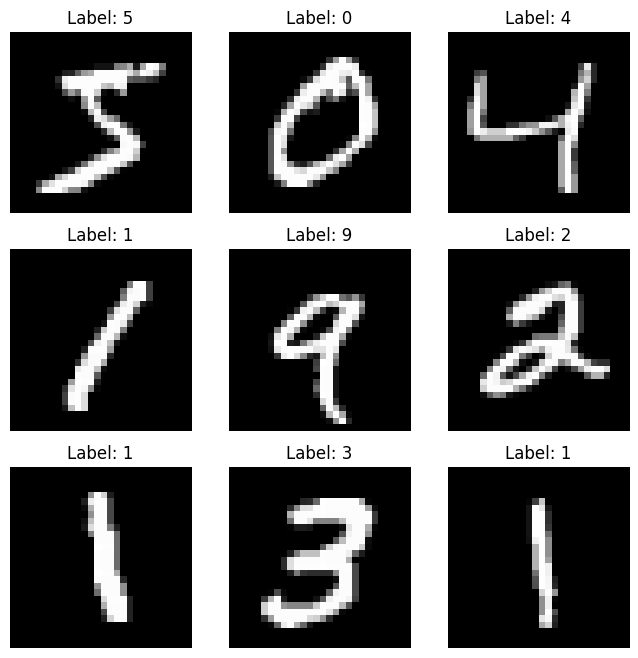

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i].reshape(28,28), cmap = 'gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

cifar 10 model for colour images

In [9]:
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
X_train_c10 - X_train_c10 / 255.0
X_test_c10 - X_test_c10 / 255.0
print(f"CIFAR-10 train shape: {X_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


Day - 2

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
    Conv2D(32, (3, 3), activation= 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation= 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_split = 0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.8974 - loss: 0.3326 - val_accuracy: 0.9841 - val_loss: 0.0538
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9845 - loss: 0.0524 - val_accuracy: 0.9824 - val_loss: 0.0548
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9900 - loss: 0.0327 - val_accuracy: 0.9882 - val_loss: 0.0385
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9930 - loss: 0.0232 - val_accuracy: 0.9869 - val_loss: 0.0424
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9943 - loss: 0.0167 - val_accuracy: 0.9862 - val_loss: 0.0487


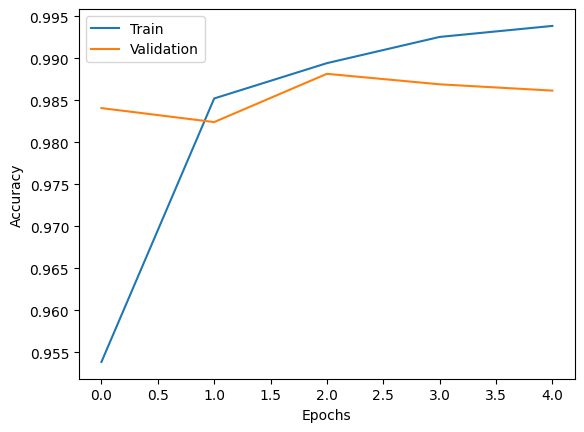

In [12]:
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [13]:
test_loss, test_acc=model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc : .4f}")
y_pred = model.predict(X_test).argmax(axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9848 - loss: 0.0528
Test accuracy:  0.9881
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [14]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation= 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation= 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Day - 3
what is deeper cnn - more layers to learn more complex

Data Augmentation - artifivially increasing data by making copy of existing images

What is advanced evaluation metrics -

f1 score - mean of precision and recall

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,

)
datagen.fit(X_train_c10)


In [16]:
from tensorflow.keras.layers import BatchNormalization
# batchnormalization - model won't stuck if image is in different positions
model = Sequential([
    Conv2D(32, (3, 3), activation= 'relu', input_shape = (32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation= 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation = 'relu'),
    Dropout(0.5),
    Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#model.summary()
model.fit(datagen.flow(X_train_c10, y_train_c10, batch_size = 32), epochs = 10, validation_data = (X_test_c10, y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 81ms/step - accuracy: 0.3089 - loss: 1.9332 - val_accuracy: 0.4953 - val_loss: 1.3529
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 81ms/step - accuracy: 0.4538 - loss: 1.5074 - val_accuracy: 0.5681 - val_loss: 1.2116
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 87ms/step - accuracy: 0.5085 - loss: 1.3735 - val_accuracy: 0.5941 - val_loss: 1.1366
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.5421 - loss: 1.3036 - val_accuracy: 0.6330 - val_loss: 1.0537
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.5691 - loss: 1.2332 - val_accuracy: 0.6518 - val_loss: 1.0094
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.5850 - loss: 1.1955 - val_accuracy: 0.6412 - val_loss: 1.0500
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.5979 - loss: 1.1581 - val_accuracy: 0.6489 - val_loss: 1.0275
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.6079 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
              precision    recall  f1-score   support

           0       0.57      0.85      0.68      1000
           1       0.74      0.89      0.81      1000
           2       0.54      0.60      0.57      1000
           3       0.58      0.32      0.41      1000
           4       0.75      0.47      0.58      1000
           5       0.63      0.59      0.61      1000
           6       0.71      0.84      0.77      1000
           7       0.75      0.74      0.75      1000
           8       0.81      0.77      0.79      1000
           9       0.77      0.74      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.67     10000
weighted avg       0.69      0.68      0.67     10000



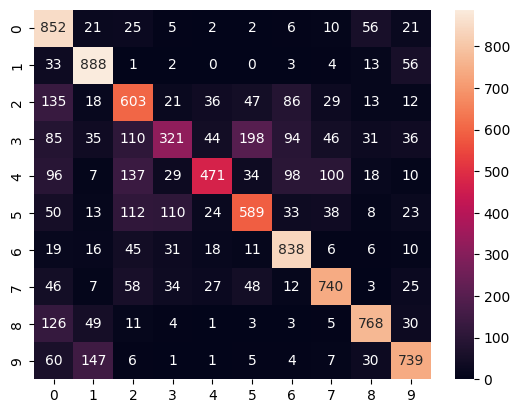

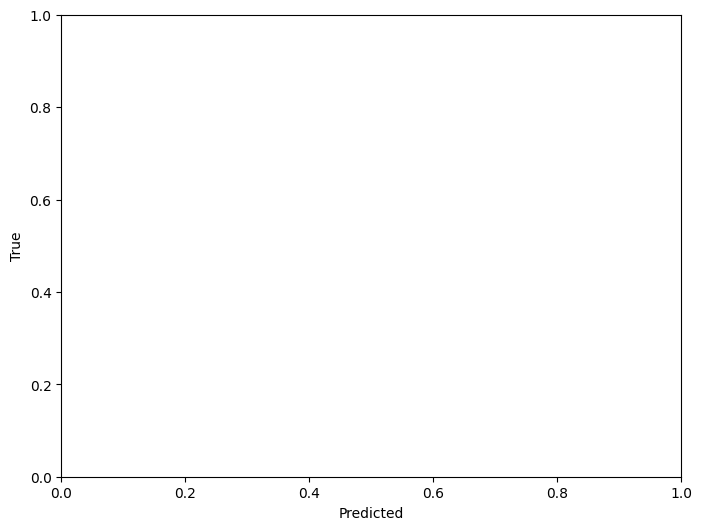

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_pred_c10=model.predict(X_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.figure(figsize=(8,6))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [21]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory(
    '/content/dogs-vs-cats', target_size=(224,224),batch_size=32,class_mode= "binary", subset='training'
)
val_generator=datagen.flow_from_directory(
    '/content/dogs-vs-cats', target_size=(224,224),batch_size=32,class_mode= "binary", subset='validation'
)



Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [26]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 495s 2s/step - accuracy: 0.7601 - loss: 0.5620 - val_accuracy: 0.7845 - val_loss: 0.5453
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 474s 2s/step - accuracy: 0.8020 - loss: 0.4991 - val_accuracy: 0.7935 - val_loss: 0.5303
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 540s 2s/step - accuracy: 0.7971 - loss: 0.4984 - val_accuracy: 0.7970 - val_loss: 0.5274
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 437s 2s/step - accuracy: 0.7936 - loss: 0.4938 - val_accuracy: 0.7985 - val_loss: 0.5447
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.8033 - loss: 0.4763 - val_accuracy: 0.7975 - val_loss: 0.5336


In [28]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentrophy', metrics=['accuracy'])
model.fit(train_generator,epochs=3, validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1802s 7s/step - accuracy: 0.7986 - loss: 0.5137 - val_accuracy: 0.7980 - val_loss: 0.5387
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1760s 7s/step - accuracy: 0.8030 - loss: 0.4703 - val_accuracy: 0.7980 - val_loss: 0.5390
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1772s 7s/step - accuracy: 0.8039 - loss: 0.4414 - val_accuracy: 0.7940 - val_loss: 0.5404


In [32]:
model.save('mobilenet_cats_dogs.h5')
#TO load
import tensorflow as tf
model = tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step


/tmp/ipython-input-3555484980.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


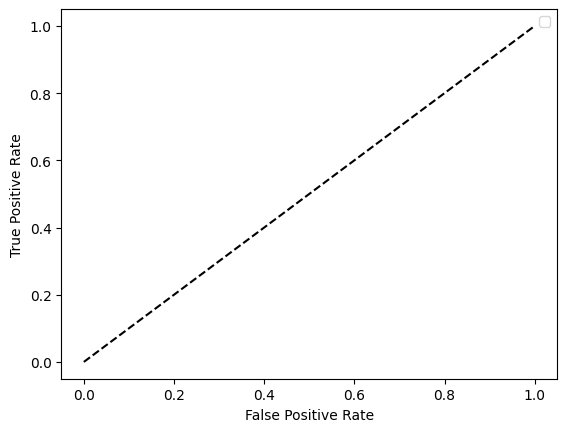

In [34]:
from sklearn.metrics import roc_curve,auc
y_pred_proba=model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,y_pred_proba)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Day - 5

In [29]:
from google.colab import files
uploaded = files.upload()

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = '/content/8601495.jpg'
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
prediction = model.predict(img_array)
print("Predicted class", "Dog" if prediction[0][0] > 0.5 else "Cat")


Saving 8601495.jpg to 8601495 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class Dog


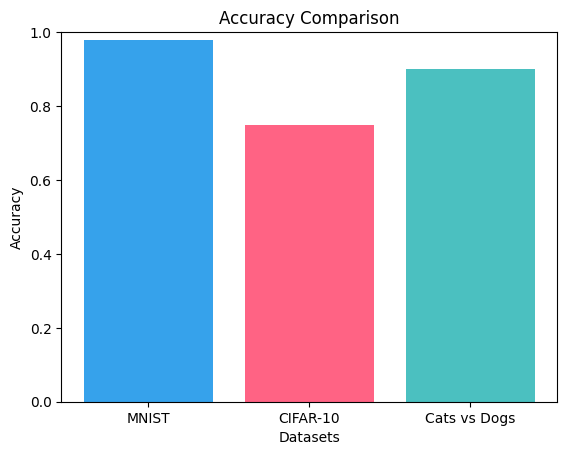

In [31]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs Dogs']
accuracies = [0.98, 0.75, 0.90]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Accuracy Comparison')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()